Epoch 1/10
65/65 [==============================] - 4s 48ms/step - loss: 0.2766 - accuracy: 0.9712 - val_loss: 0.0560 - val_accuracy: 0.9894
Epoch 2/10
65/65 [==============================] - 4s 69ms/step - loss: 0.0923 - accuracy: 0.9862 - val_loss: 0.0553 - val_accuracy: 0.9894
Epoch 3/10
65/65 [==============================] - 3s 46ms/step - loss: 0.0888 - accuracy: 0.9862 - val_loss: 0.0518 - val_accuracy: 0.9894
Epoch 4/10
65/65 [==============================] - 3s 47ms/step - loss: 0.0830 - accuracy: 0.9862 - val_loss: 0.0418 - val_accuracy: 0.9894
Epoch 5/10
65/65 [==============================] - 3s 46ms/step - loss: 0.0741 - accuracy: 0.9865 - val_loss: 0.0351 - val_accuracy: 0.9894
Epoch 6/10
65/65 [==============================] - 4s 66ms/step - loss: 0.0740 - accuracy: 0.9848 - val_loss: 0.0356 - val_accuracy: 0.9894
Epoch 7/10
65/65 [==============================] - 3s 48ms/step - loss: 0.0725 - accuracy: 0.9867 - val_loss: 0.0374 - val_accuracy: 0.9894
Epoch 8/10
65

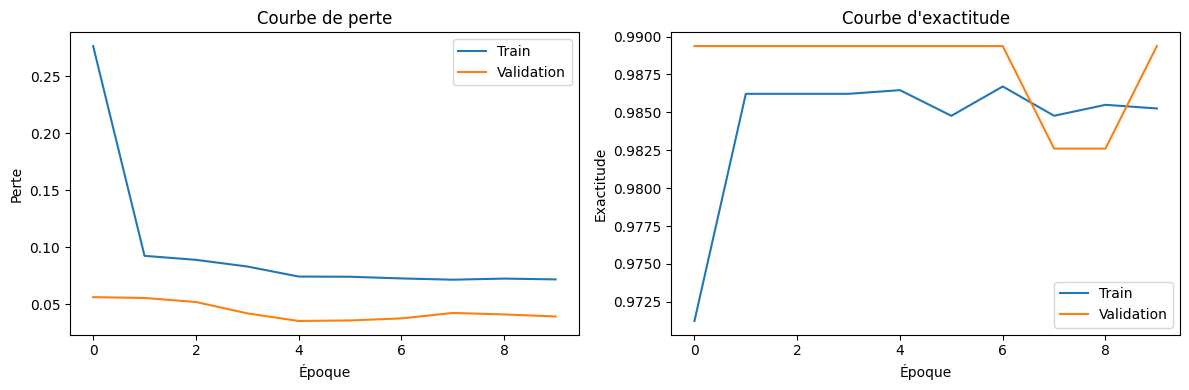

33/33 [==============================] - 0s 7ms/step


<Figure size 600x600 with 0 Axes>

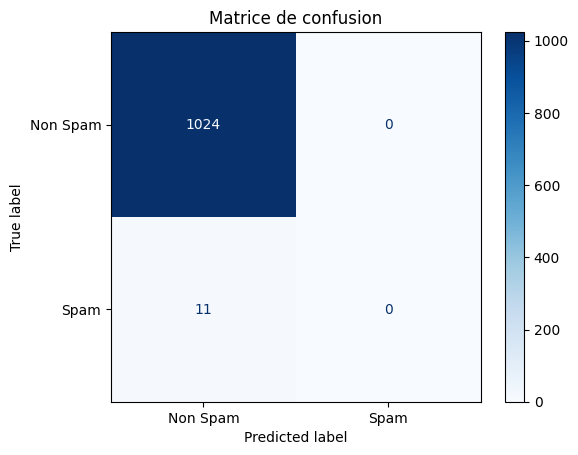

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Chargement des données
data = pd.read_csv('emails.csv', dtype={'text': str})

# Prétraitement du texte
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

# Padding des séquences pour qu'elles aient la même longueur
max_sequence_length = 200  # Ajustez cette valeur en fonction de la longueur de vos séquences
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Encodage des étiquettes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['spam'])

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paramètres du modèle
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

# Construction du modèle CNN avec ajustements
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(128, 3, activation='relu'))  # Ajustez la taille du noyau à 3 ou plus petit
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Tracé des courbes de perte et d'exactitude
plt.figure(figsize=(12, 4))

# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

# Courbe d'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Courbe d\'exactitude')
plt.xlabel('Époque')
plt.ylabel('Exactitude')
plt.legend()

plt.tight_layout()
plt.show()

# Prédiction sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non Spam', 'Spam'])

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.show()


In [ ]:
# Nouvel email
new_email = ["Salut, gagnez de l'argent rapidement avec notre offre exclusive ! Cliquez ici pour en savoir plus."]

# Prétraitement du nouvel email
new_sequences = tokenizer.texts_to_sequences(new_email)
new_X = pad_sequences(new_sequences, maxlen=max_sequence_length)

# Prédiction sur le nouvel email
new_prediction = model.predict(new_X)

# Affichage du résultat
if new_prediction > 0.5:
    print("Le modèle prédit que le nouvel email est un spam.")
else:
    print("Le modèle prédit que le nouvel email n'est pas un spam.")


1/1 [==============================] - 0s 21ms/step
Le modèle prédit que le nouvel email n'est pas un spam.
